### This notebook goes over fundamentals of using Python's __Xarray__ package to work with > 1D datasets in the form of __netcdf (.nc)__ files. For your second mini-project you will need to be able to load in global climate datasets in the form of netcdf files and create effective analysis and visualizations of them. Use this lesson as a resource to look back on when you are working on your second mini-project.
 
 
#### Portions of this notebook are inspired from the [Xarray in 45 minutes tutorial](https://tutorial.xarray.dev/overview/xarray-in-45-min) and your assigned reading was to scroll through the tutorial to learn more.

### Specifically:
* ### [Data Structures](https://tutorial.xarray.dev/fundamentals/01_datastructures.html)
* ### [Indexing & Selecting Data](https://tutorial.xarray.dev/fundamentals/02.1_indexing_Basic.html)
* ### [Basic Computation](https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html)
* ### [Basic Plotting](https://tutorial.xarray.dev/fundamentals/04.1_basic_plotting.html)
 
 __Author__: Dr. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu.

### For this lesson, we are using NOAA's OI SST Monthly Long Term Mean 1991-2020 DataSet from https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html.

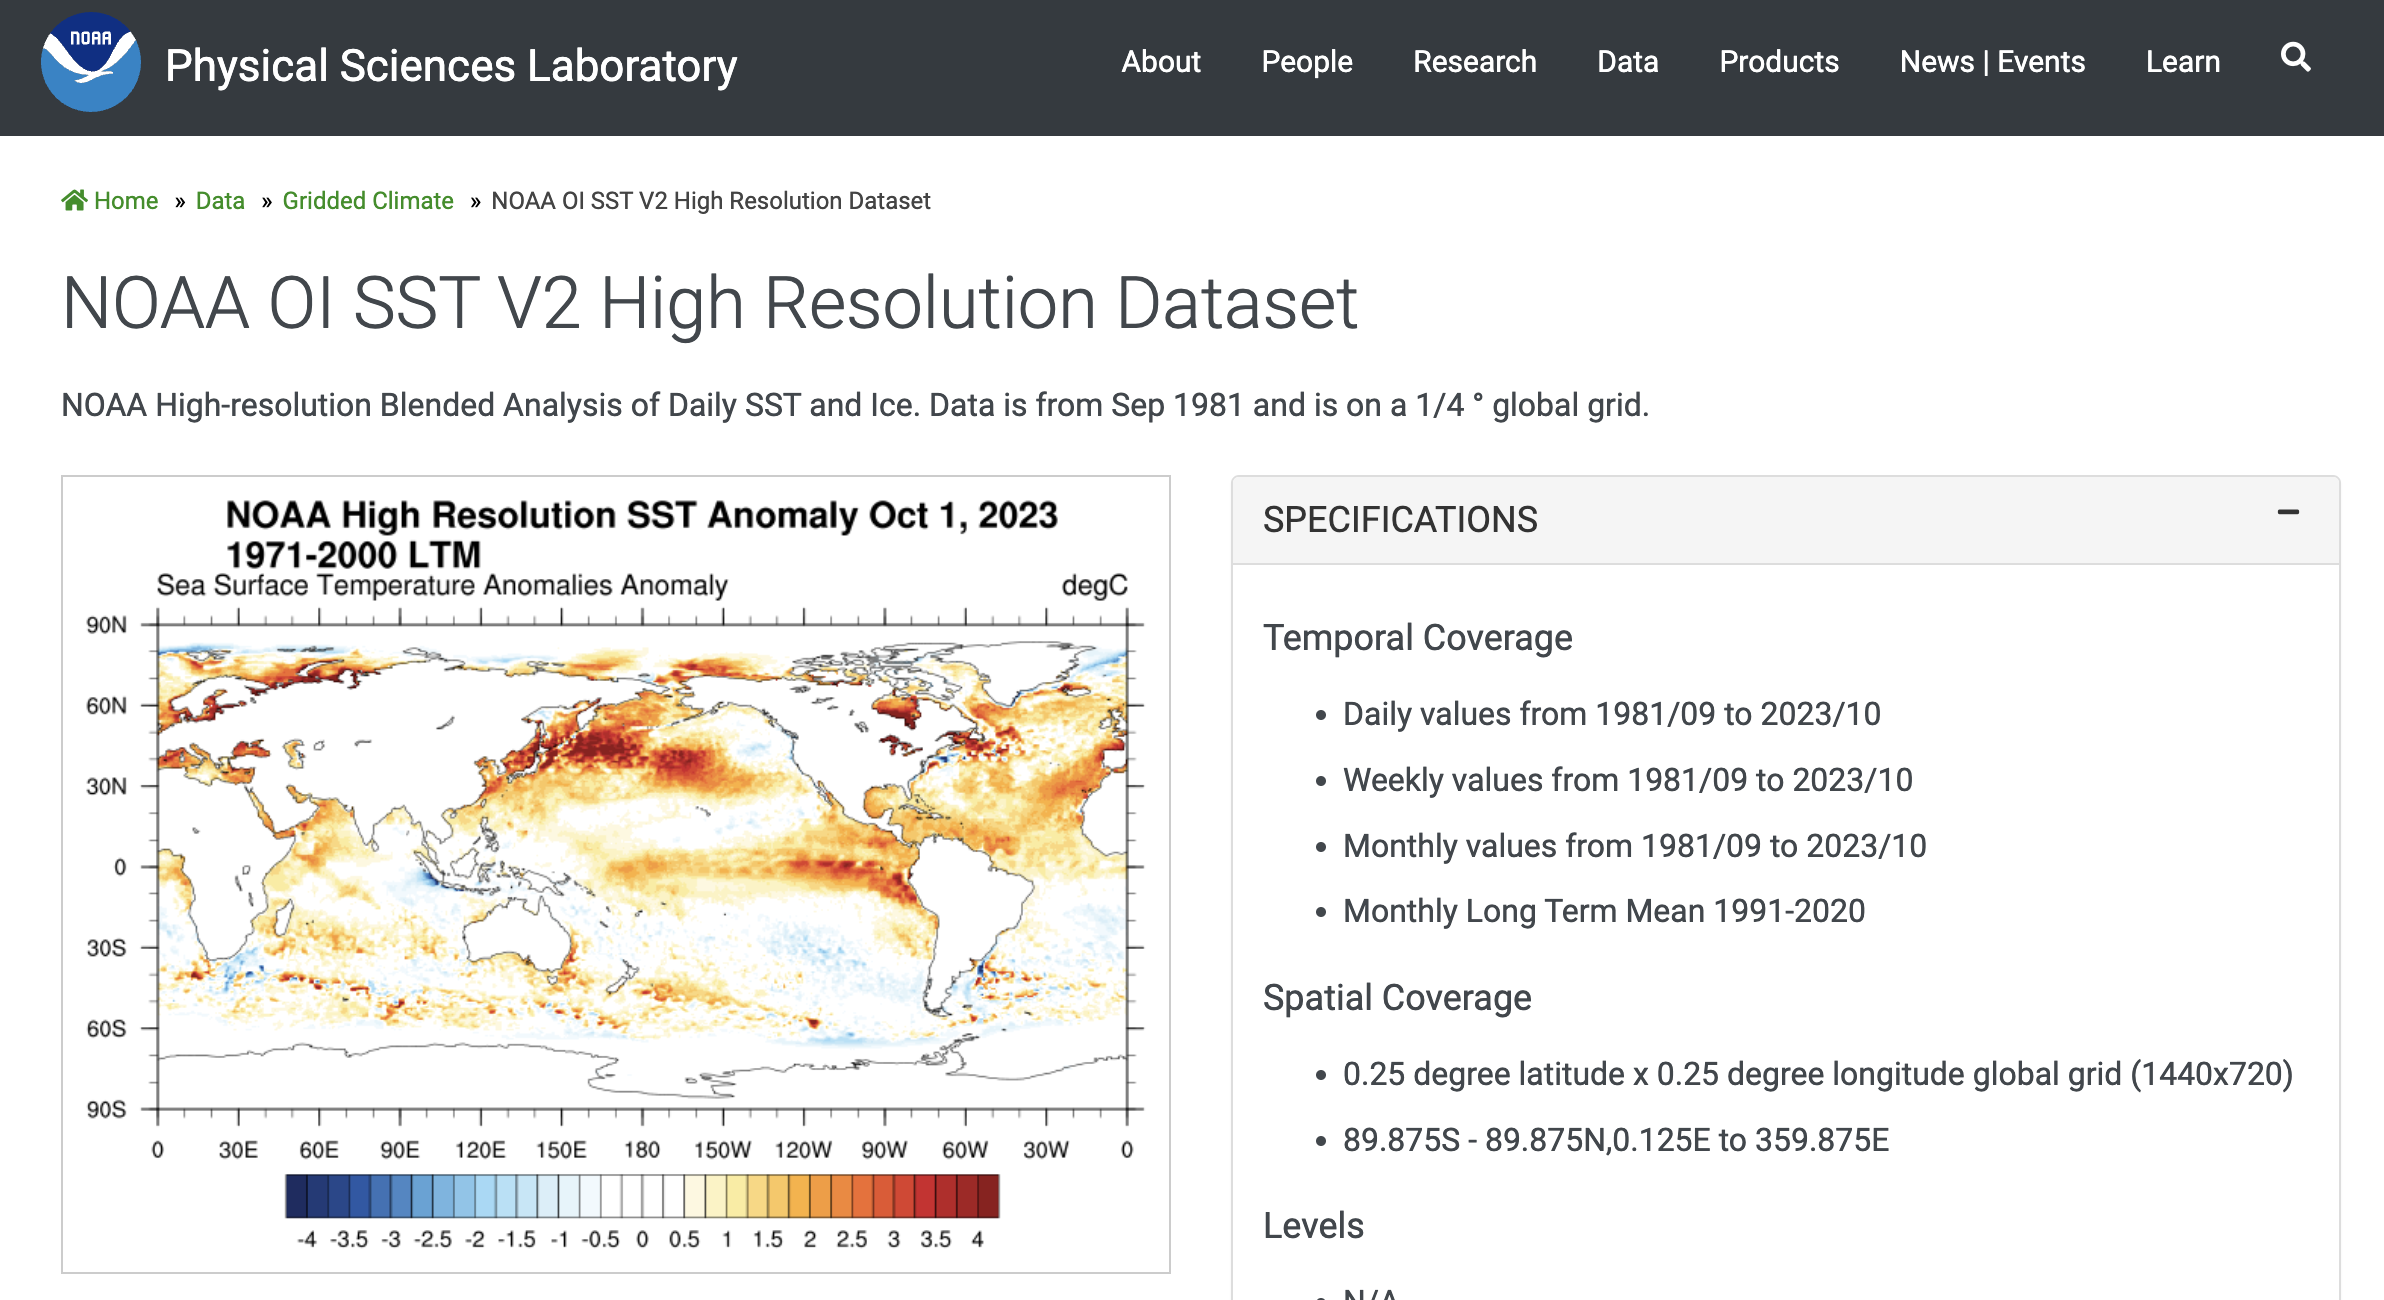

#### You should be __entering__ this lesson with ...
* Knowledge of Fundamentals of Python.
* Knowledge and skills working with 1 dimensional datasets.
* The ability to create figures, plots, and subplots using Matplotlib
* Knowledge of Python's colormaps & cmoocean

#### You should be __leaving__ this lesson with ...
* The ability to read in a netcdf file that contains climate data using Xarray.
* Knowledge of Xarray DataArrays and Datasets.
* Understanding of the differences between __dimensions__, __coordinates__, and __attributes__ of a Dataset and how to view this information.
* Knowledge of __postion based__ indexing (`.isel()`), and __label-based__ indexing (`.sel()`) methods.
* Knowledge of __slicing__ DataArrays.
* Knowledge of computing (_non-weighted_) temporal and spatial averages using Xarrays's `.mean()` method.
* Knowledge of using Xarray's `.plot()` method to create basic visualizations.



In [1]:
import matplotlib.pyplot as plt 
import xarray as xr
import cmocean 

In [2]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

### In this lesson you will learn how to use the Xarray Python package to import, analyze, visualize climate datasets. Xarray is a very powerful Python package that has become widely adapted and developed by the climate community.

![](https://repository-images.githubusercontent.com/13221727/f43c8900-75c0-11ea-9e1b-66b0af0689e0)</center>


### Through your work thus far in this course, you have encountered the following data structures:

### Pandas:
* #### __Series__: 1D labeled array holding data of any type.¶
* #### __DataFrame__: 2D data structure that holds data like a Table with rows or columns (think of an Excel spreadsheet).

### NumPy:
* #### N-dimensional, NumPy arrays (numpy.ndarray): an array with __any number__ of dimensions.

### Pandas' series & DataFrames provide us with nice labeled tabluar data to work with, while NumPy provides us with the power of array operations. NumPy is the primary way to work with raw N-dimensional arrays (just the raw numerical data). Yet, real-world datasets usually come with information beyond just the raw numbers; i.e., the arrays contain information about how the array values __map to locations in space, time, etc__.

### For example, a climate dataset that contains temperature and precipitation data also likely contains information regarding location of the raw data (y: __latitude__, y: __longitude__) and the time it was measured or simulated (__time__).

### It would be very cumbersome to have to identify a particular region in the center of the globe with just knowledge of arrays indices (i.e., [0,100], [300,20], etc). Locating via index is not bad for smaller datasets or when the # of points in particular dimension is not that large, but beyond that, it gets hard ....


![](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

#### _Segments of the following text are directly from: https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html_

### In the graphic above ... you’ll notice multiple data variables (temperature, precipitation), coordinate variables (latitude, longitude), and dimensions (x, y, t). 

### "Xarray introduces __labels__ in the form of __dimensions__, __coordinates__ and __attributes__ on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience."

### Xarray doesn’t just keep track of labels on arrays – it uses them to provide a powerful and concise interface. For example:
* #### Apply operations over dimensions by name: `x.sum('time')`.
* #### Select values by label (or logical location) instead of integer location: `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`.

### " The immediate payoff of using xarray is that __you’ll write less code__. The long-term payoff is that you’ll understand what you were thinking when you come back to look at it weeks or months later. "

### The data structures in Xarray that you need to be away of are DataArrays and Datasets.
* #### __Dataset__ : this is the "file" that you load which __contains__ DataArrays. This may contain one or more arrays, for example a Dataset may contain DataArrays of both temperature and precipitation (see example graphic above).
* #### __DataArray__: a single array with associated dimension names, coordinates and attributes.



### Loading in a Dataset to work with is as simple as calling the `xr.open_dataset()` method and placing the path to your file as a `str` inside of the closed `()` :

In [4]:
## Load a dataset of sea surface temperature (SST) from OISST and assign to a variable called SST_OISST:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'  #### This is the home directory we are always working out of
SST_OISST = xr.open_dataset(ees_climate_dir+'unit3/data/sst.oisst.mon.ltm.1991-2020.nc')

### To examine what the Dataset looks like you can just type the name of the variable you just defined that contains the Dataset. Examining the SST_OISST Dataset below we can see that:
* ### It has 3 dimensions (time, lat, lon):
    - ### __time__ has 12 values
    - ### __lat__ has 180 values
    - ### __lon__ has 360 values
* ### Those dimensions have "coordinate" values (i.e., their indices map to a calendar, real-world latitude, and real-world longitude)
* ### It has multiple Data variables (DataArrays): sst, ... etc.
* ### At the bottom, the _attributes_ tell us more information about the dataset including what the data is, where it is from, and references. 

In [5]:
SST_OISST

<xarray.Dataset>
Dimensions:             (lat: 180, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time                (time) datetime64[ns] 1991-01-01 ... 1991-12-01
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    sst                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 1.9.10 (ht...
    source:                         NOAA/NCEI https://www.ncei.noaa.gov/data/...
    institution:                    NOAA/National Centers for Environmental I...
    Conventions:                    CF-1.5
    title:                          NOAA/NCEI 1/4 Degree Daily Optimum Interp...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    ...                             ...
    version:                        Version 2.1
    comment:                        Reynolds, et al.(2007) Daily High-Resolut...
    CDO:                            Climate Data Operators version 1.9.10 (ht...
    history:                        Created 2023/08/08 by doMonthLTMNC4
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

# <center> Anatomy of an Xarray Dataset </center>
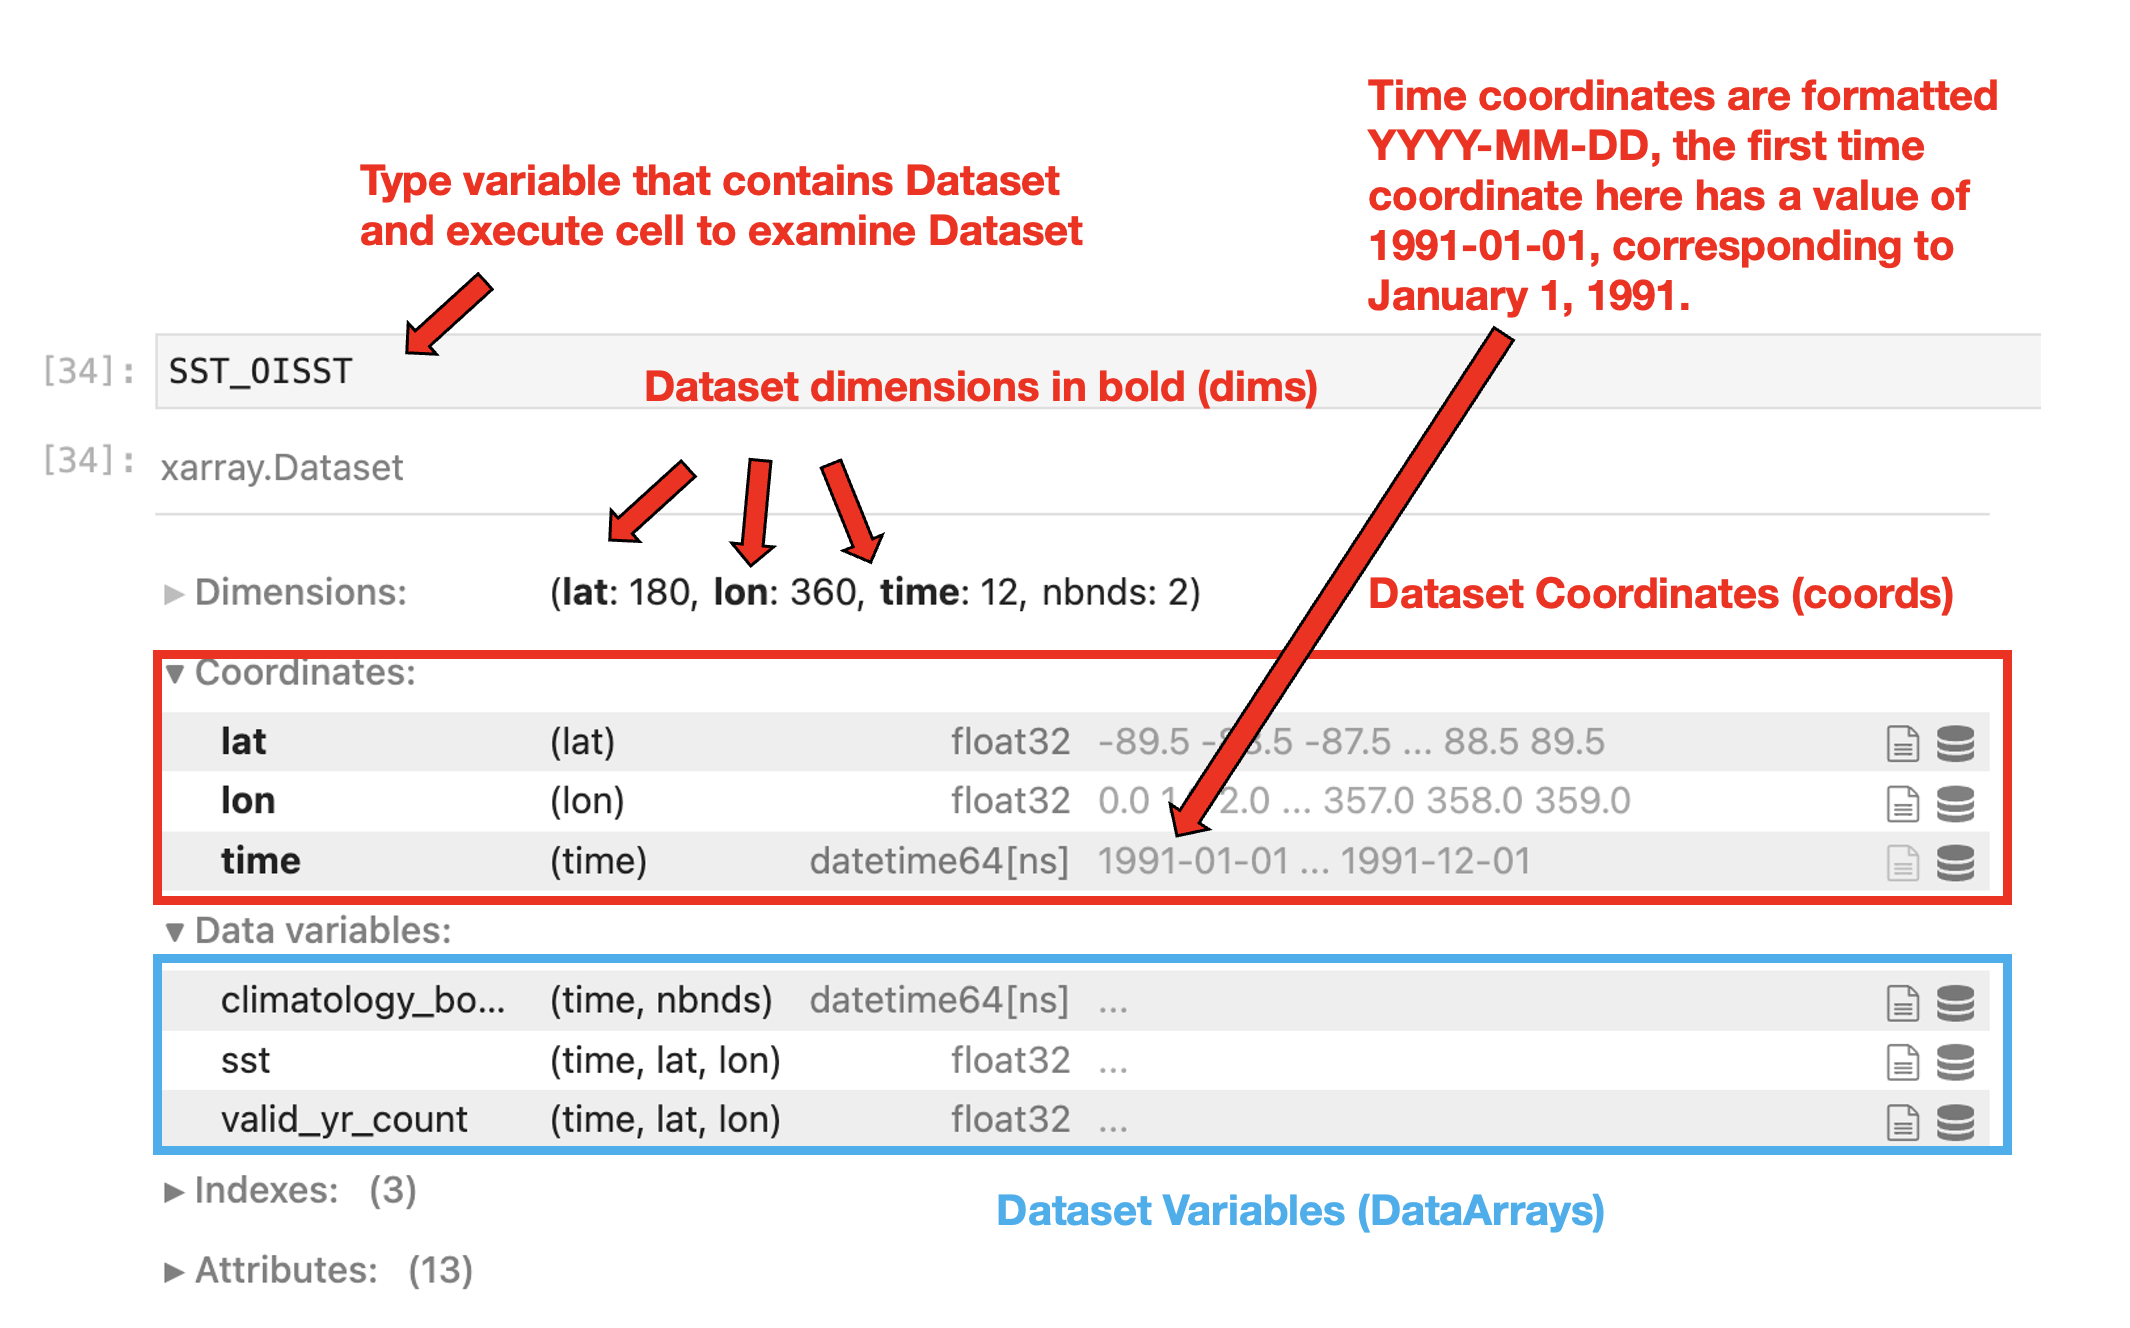

### To extract a particular variable (DataArray) from our Dataset it is as simple as the following syntax:
### `dataset.array`

In [6]:
SST = SST_OISST.sst   ## variable = dataset.array_name, here we create a variable called
                      ## SST and set it equal to the the sst DataArray inside our Dataset.

In [7]:
SST

<xarray.DataArray 'sst' (time: 12, lat: 180, lon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Long Term Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Monthly Mean
    actual_range:   [-1.796084 34.121593]

### If we want to know what the dimensions are (`dims`) within our DataArray:

In [8]:
SST.dims  ## This shows that our SST DataArray has dimensions `time`, `lat`, `lon`

('time', 'lat', 'lon')

### Coordinate variables contain the actual timestamps (dates) and spatial positions of our DataArray. If we want to know more information on the coordinate values of the DataArray.

In [9]:
SST.time  ### We see that the time dimension has a length of 12 and running from Jan 1 to Dec 1.
          ### Clicking on the little notepad widget under coordinates gives us more information. 
          ### The data is a "30 - year climatology", computed over January 1991 to December 2020. 
          ### This means the January time slice is the average of all Januarys from 1991 to 2020,
          ### the February time slice is the average of all Februarys from 1991 to 2020, ....
          ### and so on.

<xarray.DataArray 'time' (time: 12)>
array(['1991-01-01T00:00:00.000000000', '1991-02-01T00:00:00.000000000',
       '1991-03-01T00:00:00.000000000', '1991-04-01T00:00:00.000000000',
       '1991-05-01T00:00:00.000000000', '1991-06-01T00:00:00.000000000',
       '1991-07-01T00:00:00.000000000', '1991-08-01T00:00:00.000000000',
       '1991-09-01T00:00:00.000000000', '1991-10-01T00:00:00.000000000',
       '1991-11-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01

In [10]:
SST.lat  ### We see that the lat dimension has 180 values, from -89.5 (i.e., 89.5 degrees South)
         ### to 89.5 (i.e., 89.5 degrees North). Clicking on the notepad widget we see that 
         ### the name of the dimension is "latitude" and the units are "degrees_north".

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [11]:
SST.lon ### We see that the lat dimension has 360 values, from 0 to 360. 
        ### Clicking on the notepad widget we see that the name of the 
        ### dimension is "longitude" and the units are "degrees_east".

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

### If we want to know more information on the __attributes__ of the DataArray we are working with:

In [12]:
SST.attrs

{'standard_name': 'sea_surface_temperature',
 'long_name': 'Monthly Long Term Mean of Sea Surface Temperature',
 'units': 'degC',
 'precision': 2.0,
 'dataset': 'NOAA High-resolution Blended Analysis',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Long Term Mean',
 'parent_stat': 'Monthly Mean',
 'actual_range': array([-1.796084, 34.121593], dtype=float32)}

### Now that we have extracted our array that contains temperature data and assigned it to a variable named `temp`, if we want to make a 2D plot of this data it is as simple as .....

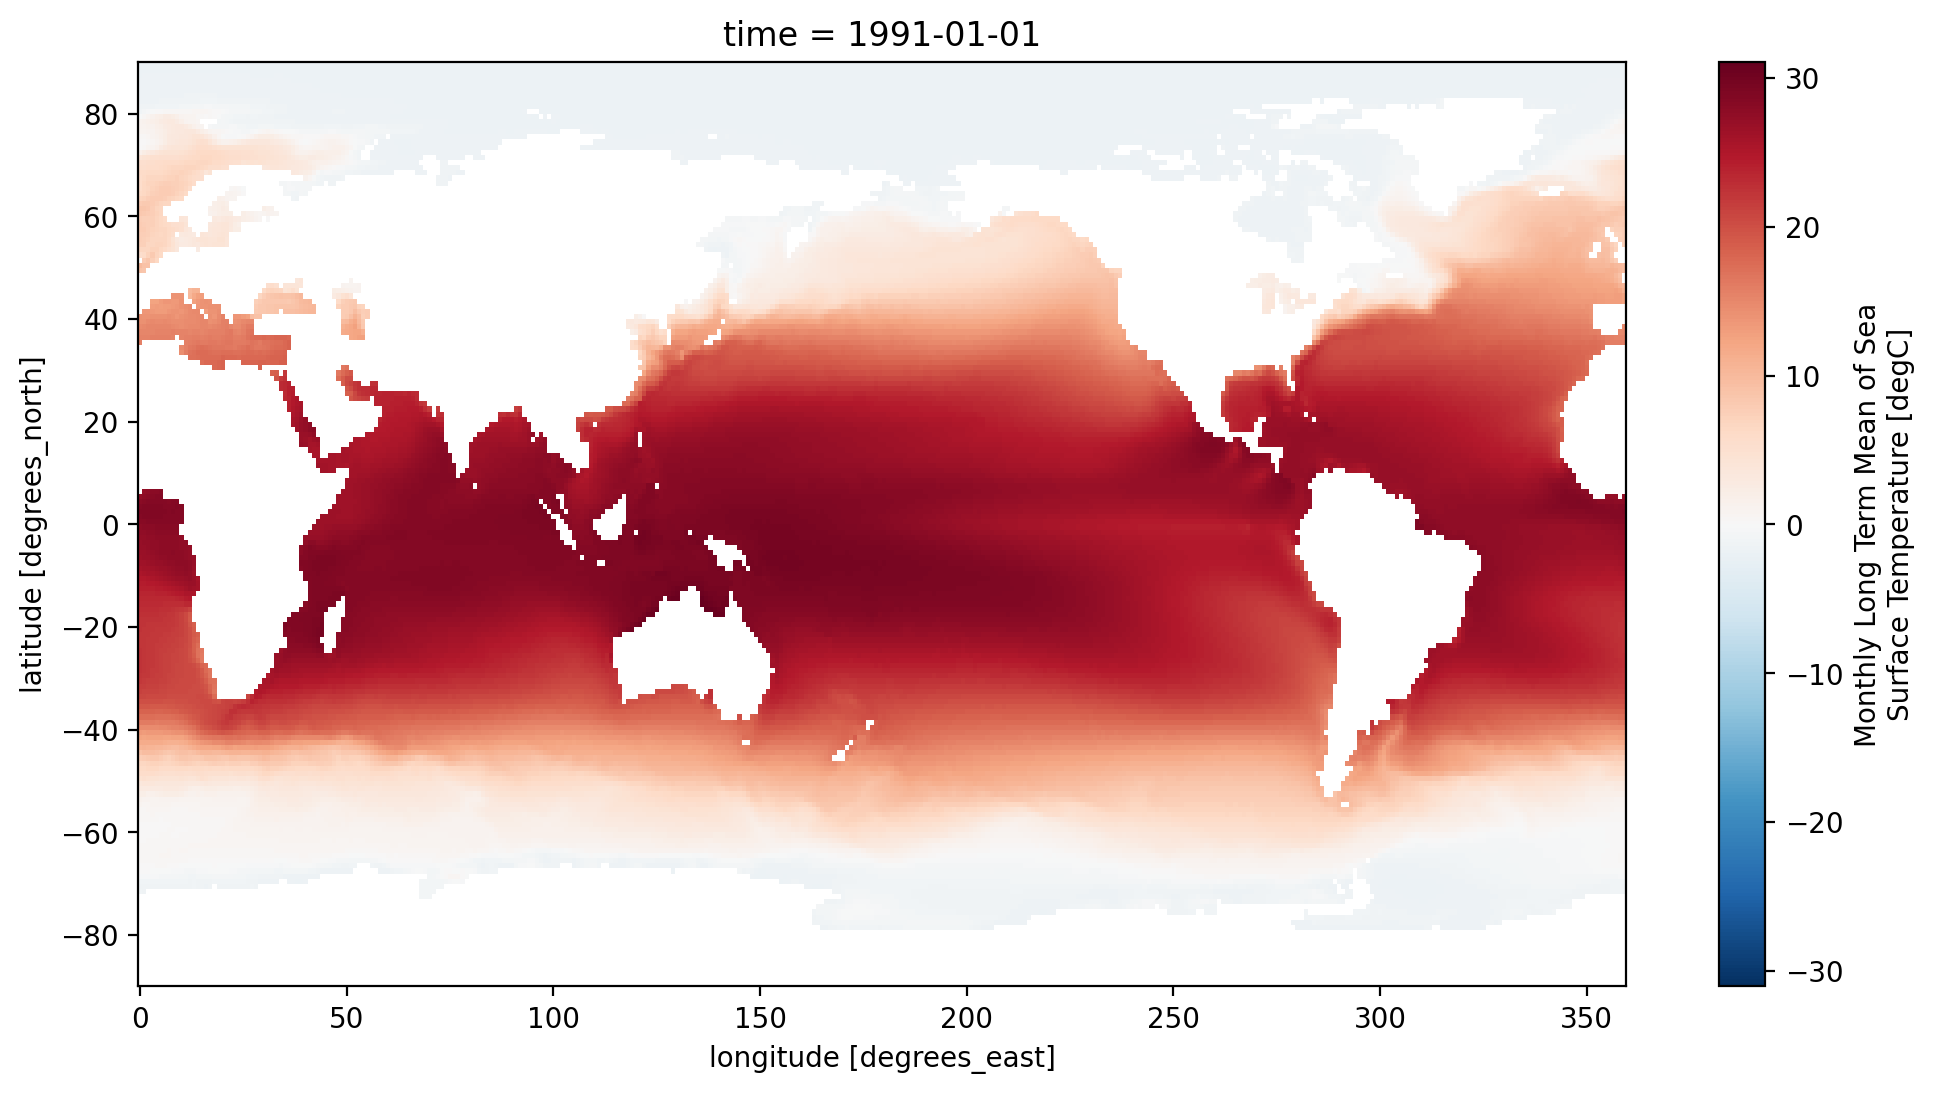

In [13]:
SST.isel(time=0).plot()

# Wow that was easy .... how did we just do that???

## KEY CONCEPT:
### In Xarray, we can "select" portions of the array using the `.sel()` and `.isel()` methods. __There is a key difference that you need to pay careful attention to!__
* #### `.isel()` is used for selecting based off of the DataArrays __indices__, i.e., how you learned selection for lists where 0 corresponds to the first element and so on ... This is known as "position-based" indexing.
* #### `.sel()` is used for selecting based off of the DataArrays __coordinate__ values or __labels__, i.e., actual time calendar values, coordinate latitude longitude values etc. This is known as "label-based" indexing.

### In the example above, we used the `.isel()` method to extract and plot the __first__ time __slice__. But with the power of Xarray, we can produce the same exact plot by using the actual coordinate time values with the `.sel()` method -- which is much more intuitive.

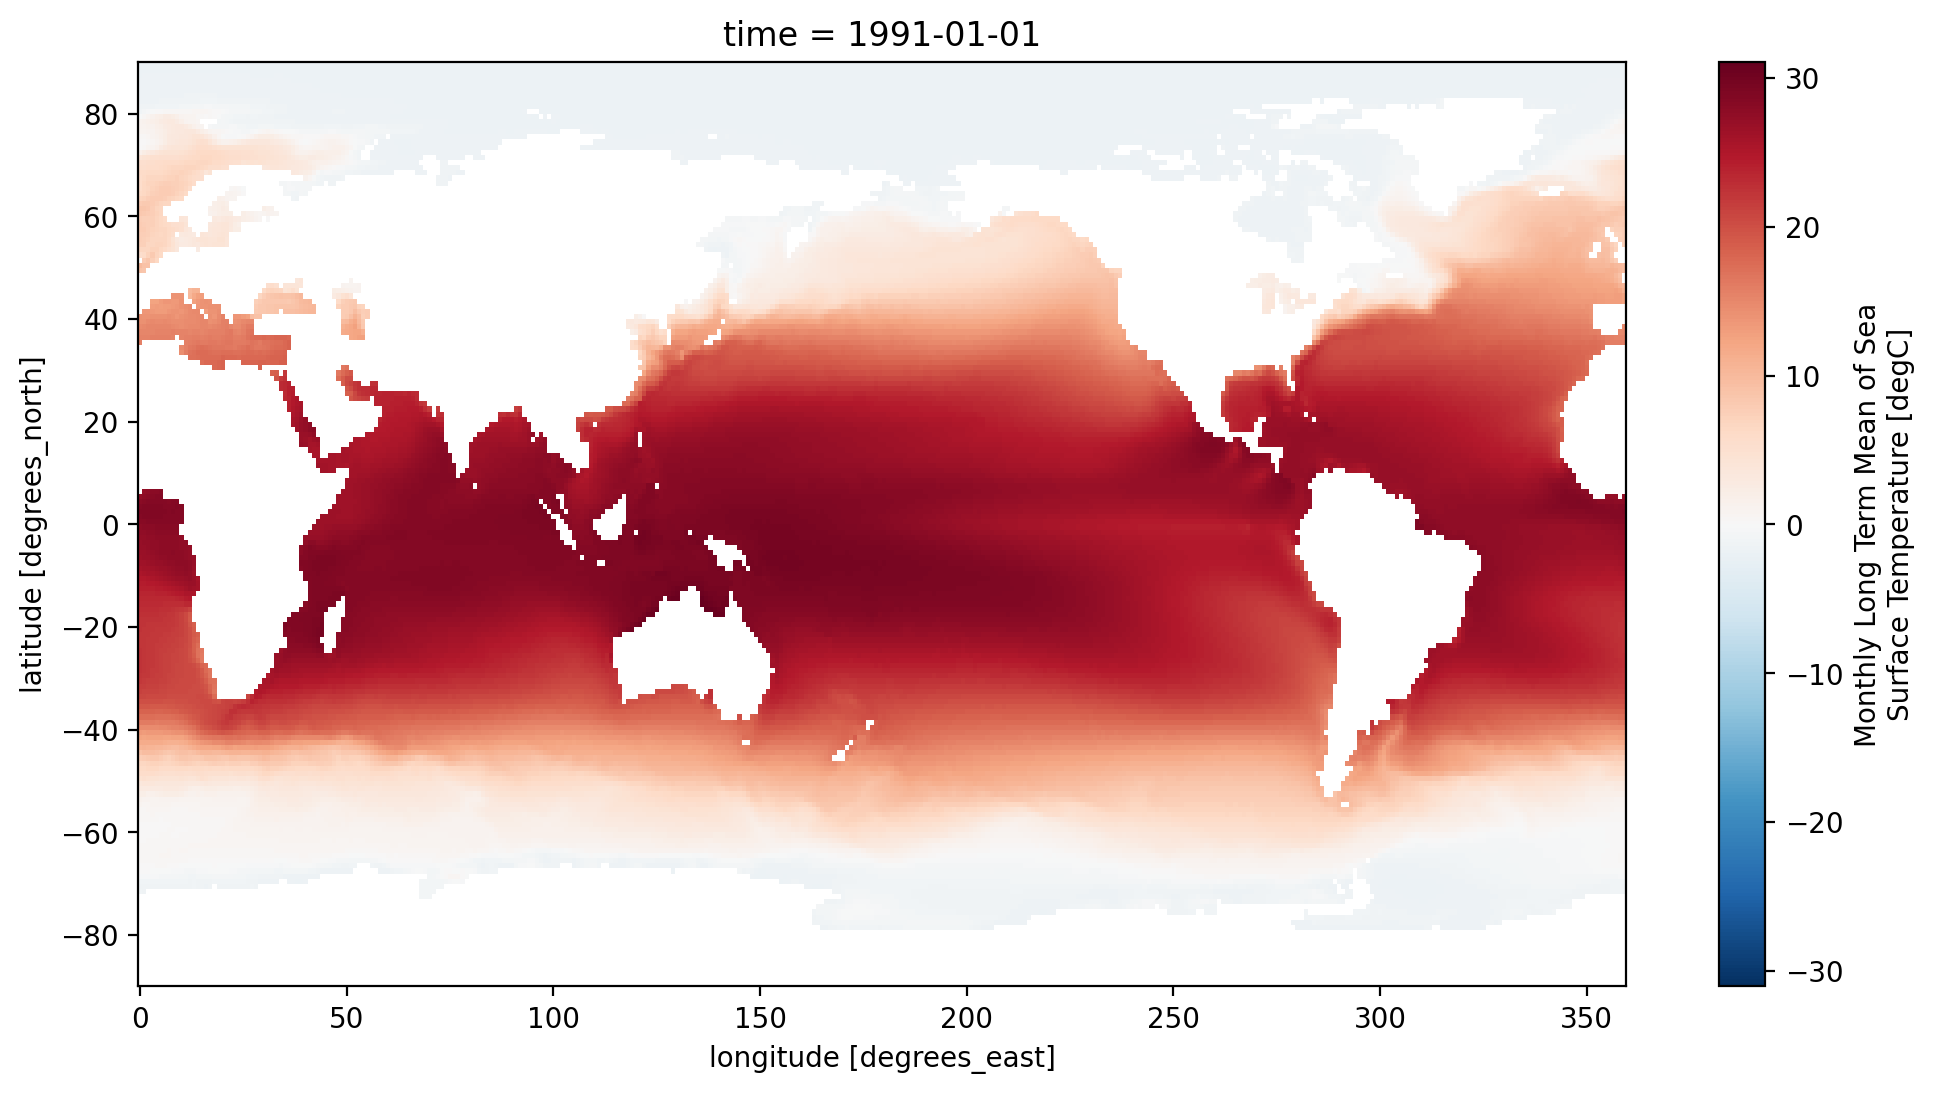

In [14]:
SST.sel(time='1991-01-01').plot() ## Note the syntax of the calendar date here is YEAR-MONTH-DAY.

### <span style="color:red">  In the cell below, write code that produces a plot the array values for September, using the `.sel()` method.

### <span style="color:red">  In the cell below, write code that produces a plot the array values for December, using the `.sel()` method.

## __Slicing:__
### We can also __slice__ our DataArray to plot just a subset of the full domain and since Xarray has knowledge of our DataArray's coordinate values this is easy!

### If we wanted to __slice__ our DataArray to only consider the Northern Hemisphere, our earlier examination of the latitude coordinates and the plot above shows us that the coordinates on the y-axis (latitude) span -89.50, 89.50 with the negative values indicating degrees South (i.e., below the equator).

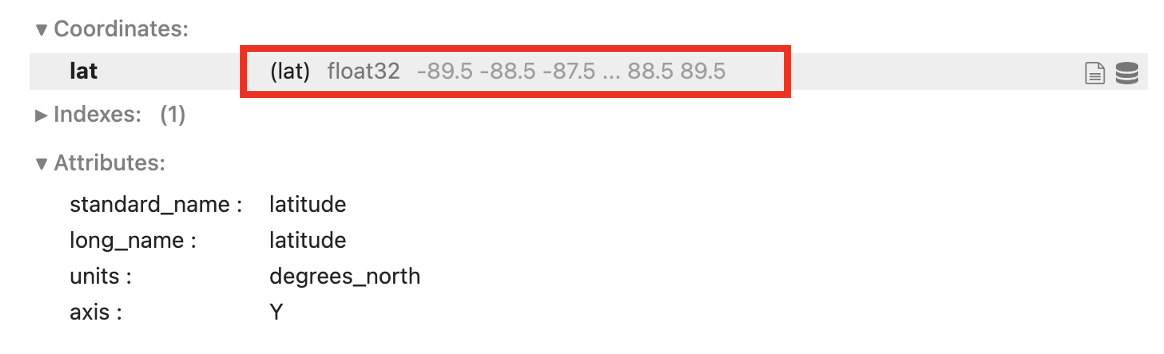

### The syntax for slicing follows: `DataArray.sel(coord_name=slice(lower_bound,upper_bound))` :

In [15]:
SST.sel(lat=slice(0,89.50))

<xarray.DataArray 'sst' (time: 12, lat: 90, lon: 360)>
[388800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Long Term Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Monthly Mean
    actual_range:   [-1.796084 34.121593]

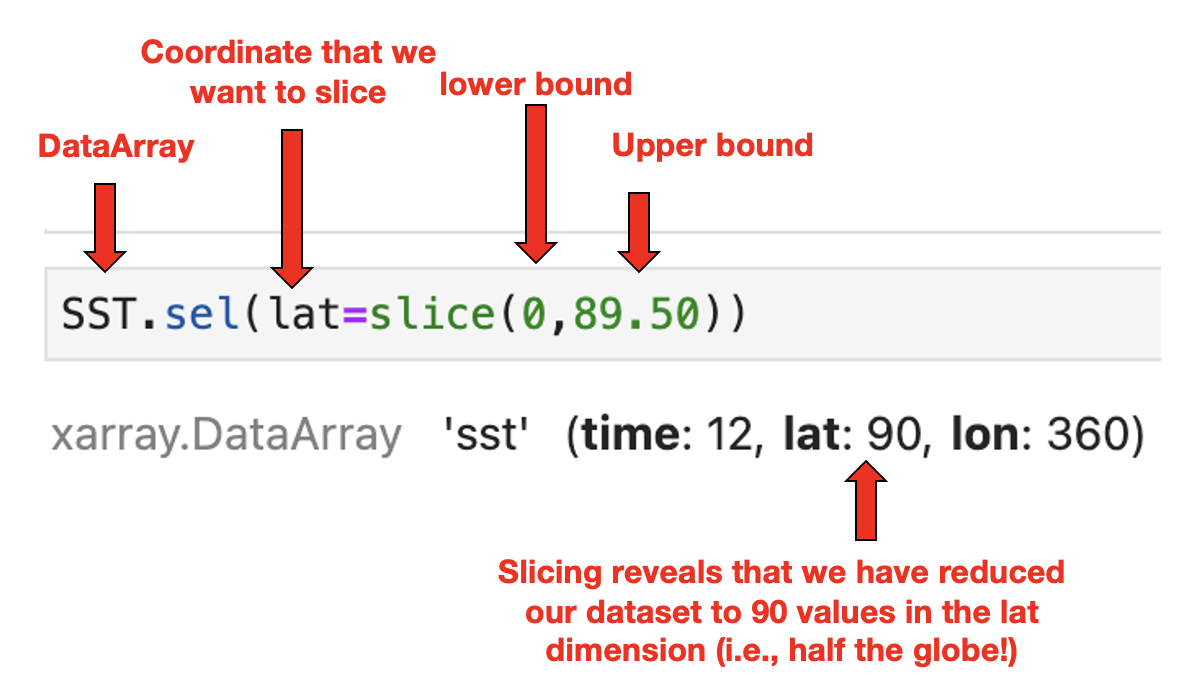

### <span style="color:red">  In the cell below, create a new variable called `NH_SST` and set it equal to your newly sliced Northern Hemisphere SST Array and plot the Northern Hemisphere SSTs for July using the `.sel()` method:

In [16]:
NH_SST = SST.sel(lat=slice(0,89.5))

### <span style="color:red">  In the cell below, create a new variable called `SH_SST` and set it equal to a sliced Southern Hemisphere SST Array and plot the Southern Hemisphere SSTs for July using the `.sel()` method:

In [17]:
SH_SST = SST.sel(lat=slice(-89.5,0))

### What if we wanted to slice in the __longitude dimension as well__ and only show the North Atlantic Ocean SST corresponding roughly to the boxed region below?

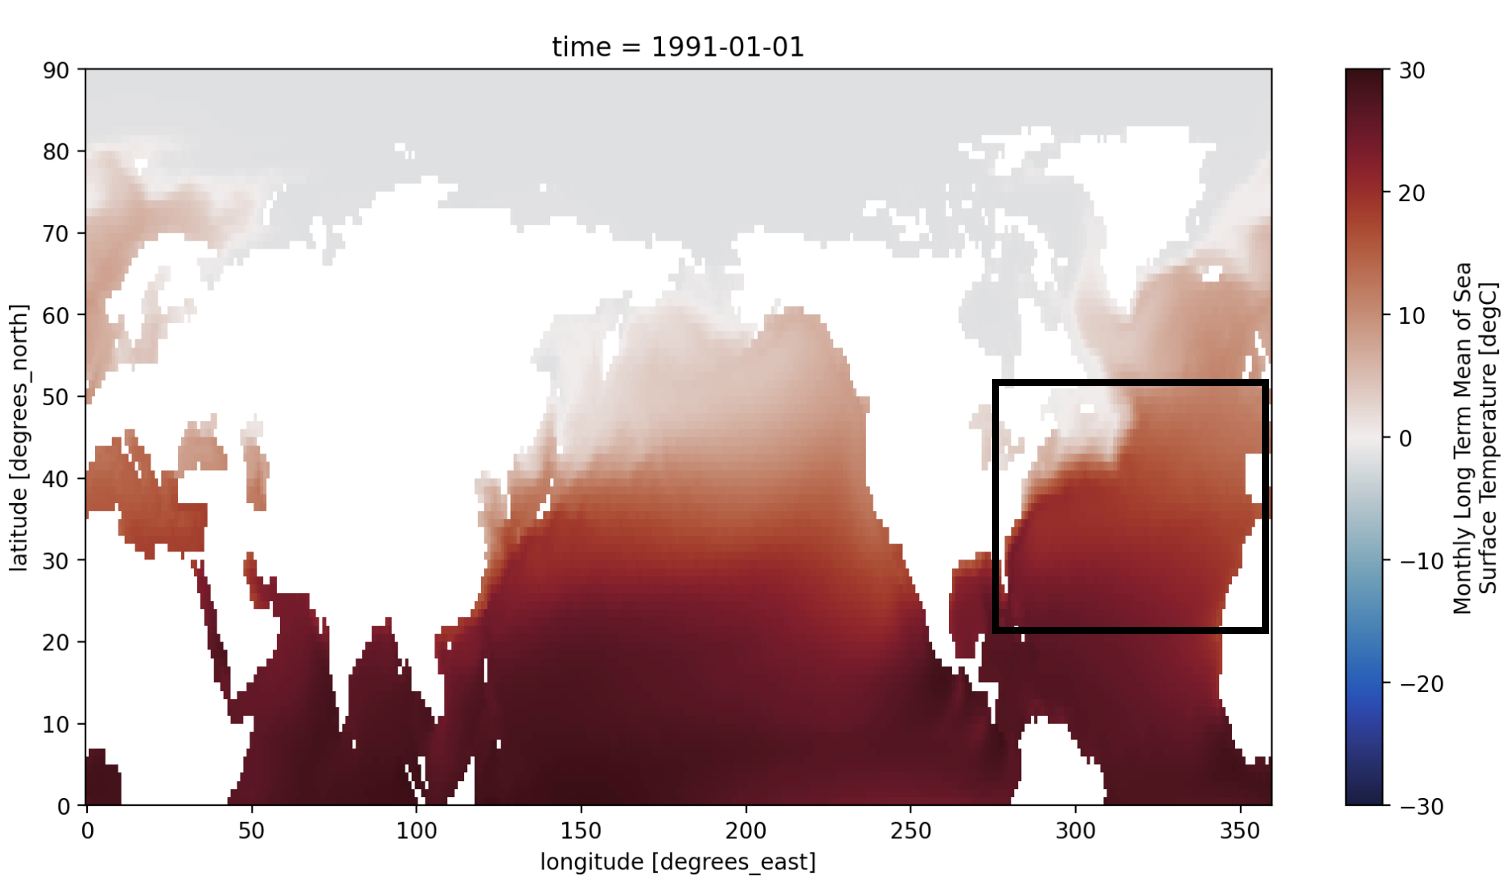

### <span style="color:red">  In the cell below, create a new variable called `North_Atlantic_SST` and set it equal to a sliced SST Array that roughly spans the region shown in the image above and plot the SSTs for July using the `.sel()` method:

In [18]:
North_Atlantic_SST = SST.sel(lat=slice(20,50),lon=slice(290,350))

In [19]:
North_Atlantic_SST

<xarray.DataArray 'sst' (time: 12, lat: 30, lon: 61)>
[21960 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 45.5 46.5 47.5 48.5 49.5
  * lon      (lon) float32 290.0 291.0 292.0 293.0 ... 347.0 348.0 349.0 350.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Long Term Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Monthly Mean
    actual_range:   [-1.796084 34.121593]

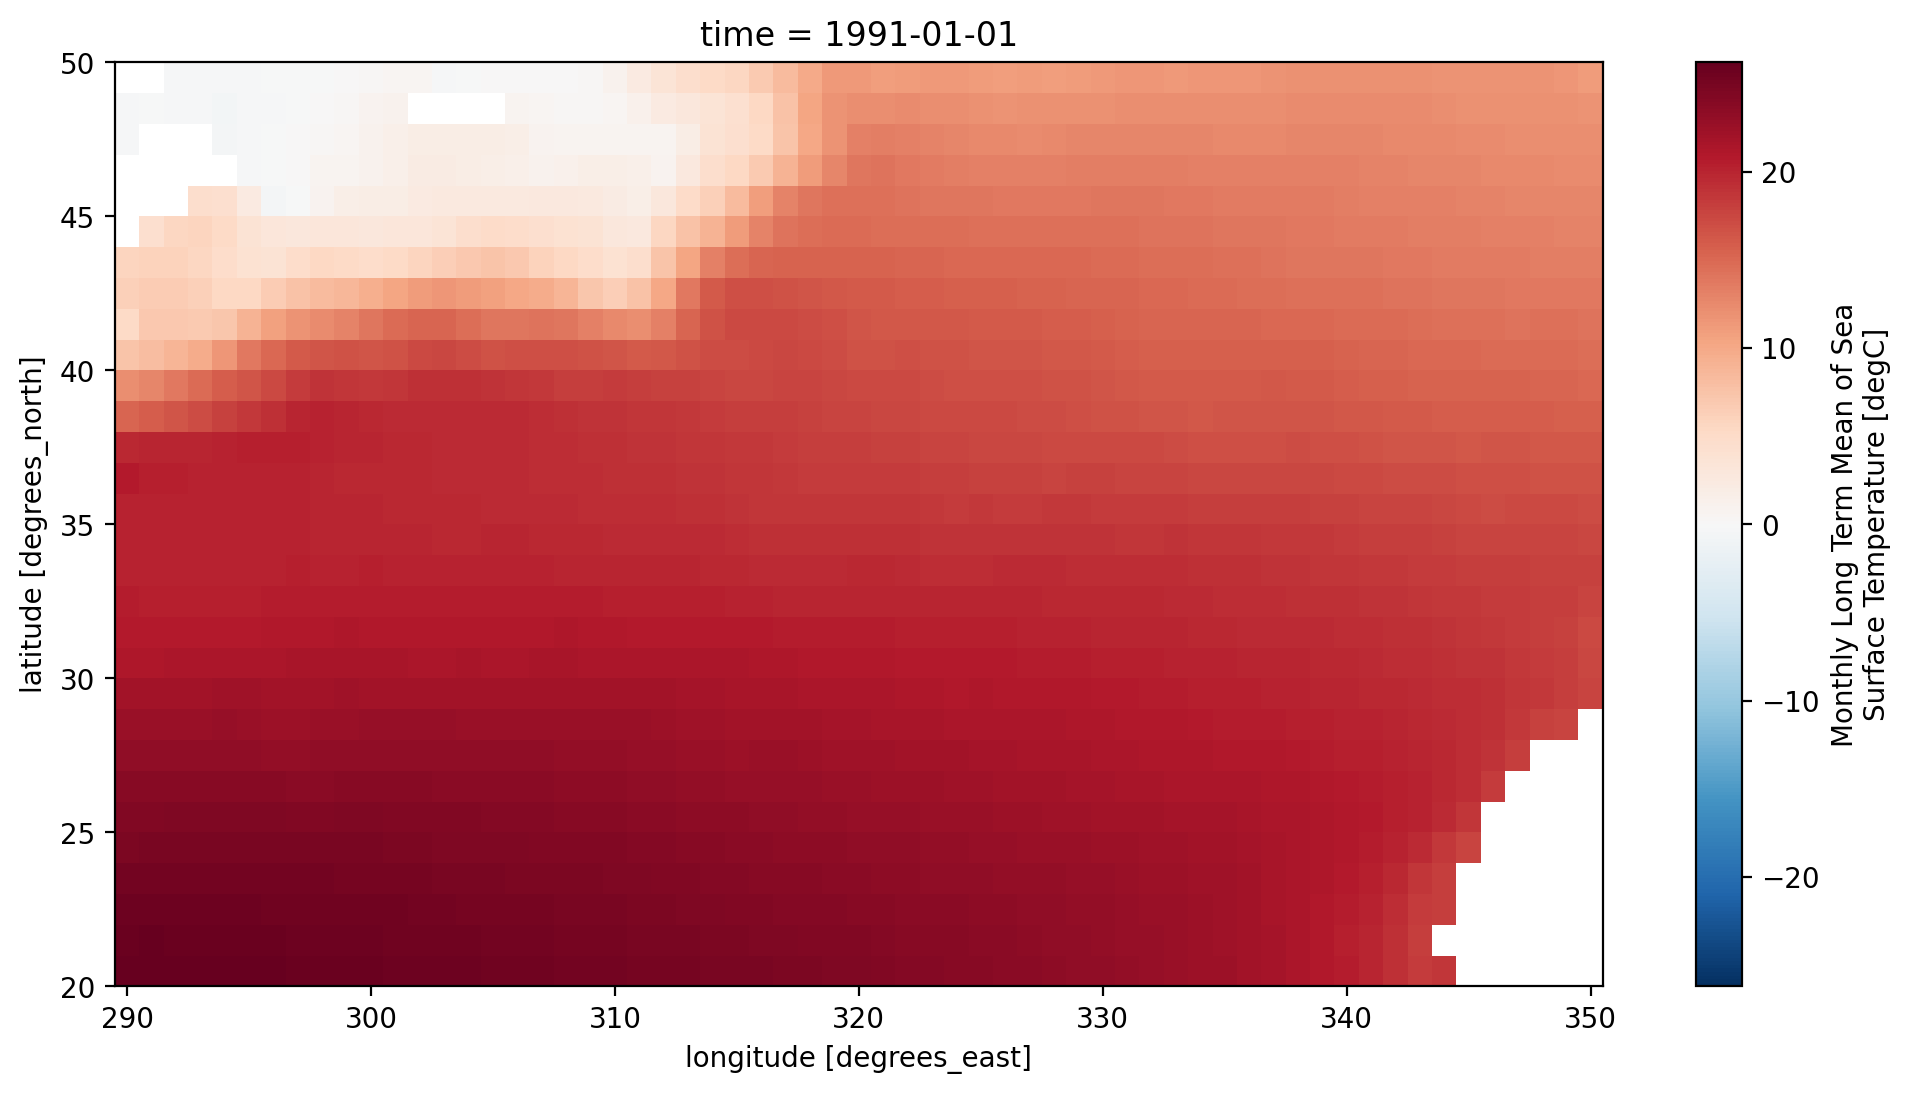

In [20]:
North_Atlantic_SST.isel(time=0).plot()

## We of course can also slice in the time coordinate as well --- this is useful when working with a much larger dataset and you only wish to work with a subset of years.

In [21]:
SST_JAN_FEB = SST.sel(time=slice('1991-01-01','1991-02-01'))
SST_JAN_FEB

<xarray.DataArray 'sst' (time: 2, lat: 180, lon: 360)>
[129600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Long Term Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Monthly Mean
    actual_range:   [-1.796084 34.121593]

## Reducing our DataArray by computing temporal (time) and spatial averages (_non-weighted_):

### When working with climate data, there are going to be times when you are interested in the __average__ conditions over a certain time period (_climate is the average conditions over a long period of time anyway!_), or the __average__ conditons over a particular region (temperatures over the North Atlantic for example).

### We refer to these averages as:
* ### __Temporal Average__ when averaging over the __time dimension__.
    - Examples: 
        - hourly data to a daily average.
        - daily data to a monthly average.
        - monthly data to an annual average.
        - annual average to a 30 year average (a 30-yr average is referred to as a __climate normal__)
* ### __Spatial Average__ when averaging over __spatial (x - y) dimensions__.
     - Examples: 
        - global average temperature (datasets you have already been working with).
* ### __Depth Average__ when averaging over a __depth (z) dimension__ (we will get to this when we start working with 3 to 4D variables)
    - Examples: 
        - average temperature (etc) over a certain layer of the atmosphere
        - average temperature (etc) over certain depths of the ocean (0 to 1000 m for example).


### Now there are details you will learn later to do this correctly considering proper area-weighting, but for now lets compute simple arithematic means using Xarray's `.mean()` method.

### The syntax for applying `.mean()` across your DataArrays dimensions:
### `DataArray.mean(dim=[dim1,dim2, ... dimn])`

In [22]:
NH_ave_sst = NH_SST.mean(dim=['lat','lon'])  ## Creates a spatial average of SSTs over the latitude
                                         ## and longitude dimension of our Northern Hemisphere DataArray
                                         ## and assigns this data to a NH_ave_sst variable.

In [23]:
NH_SST

<xarray.DataArray 'sst' (time: 12, lat: 90, lon: 360)>
array([[[28.279331, 28.313751, ..., 28.18227 , 28.231936],
        [28.595554, 28.636988, ..., 28.529959, 28.559492],
        ...,
        [-1.724291, -1.722241, ..., -1.726639, -1.725138],
        [-1.738586, -1.735977, ..., -1.736801, -1.735557]],

       [[28.751451, 28.766134, ..., 28.61302 , 28.674248],
        [28.951298, 28.974354, ..., 28.853748, 28.903967],
        ...,
        [-1.727785, -1.726985, ..., -1.730972, -1.729159],
        [-1.742983, -1.739105, ..., -1.742584, -1.740824]],

       ...,

       [[27.155561, 27.201546, ..., 27.00297 , 27.07359 ],
        [27.517057, 27.570765, ..., 27.421284, 27.46642 ],
        ...,
        [-1.690334, -1.689582, ..., -1.696049, -1.693263],
        [-1.704551, -1.696777, ..., -1.707733, -1.706247]],

       [[27.716885, 27.763567, ..., 27.603708, 27.635424],
        [28.218098, 28.275612, ..., 28.135399, 28.165222],
        ...,
        [-1.71738 , -1.714101, ..., -1.720534, -1.719111],
        [-1.729974, -1.724643, ..., -1.728363, -1.728404]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Long Term Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Monthly Mean
    actual_range:   [-1.796084 34.121593]

In [24]:
NH_ave_sst

<xarray.DataArray 'sst' (time: 12)>
array([11.98468 , 11.6947  , 11.757911, 12.17601 , 12.939881, 14.007138,
       15.240874, 16.003231, 15.741747, 14.735249, 13.620117, 12.668882],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01

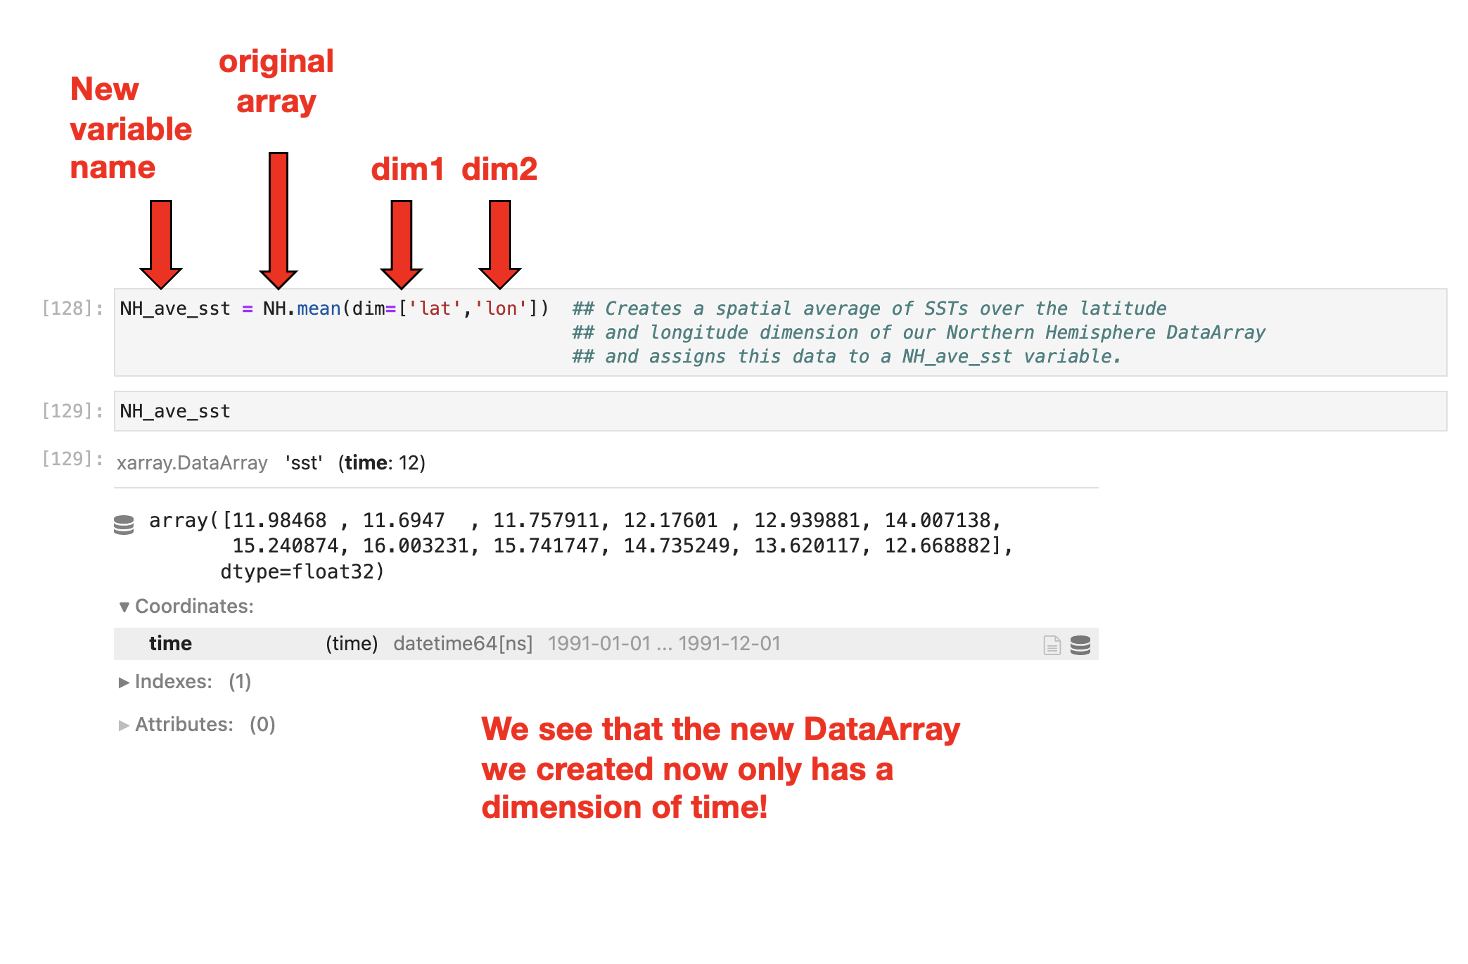

### <span style="color:red">  In the cell below, create a new variable called `SH_ave_sst` and compute the spatial average of SSTs over the entire Southern Hemsphere:

In [25]:
SH_ave_sst = SH_SST.mean(dim=['lat','lon'])

### <span style="color:red">  Examine your `SH_ave_sst` DataArray. How many dimensions does it have now? Write your answer in the cell below.

### <span style="color:red"> Recall you are working with __monthly__ climatological data ... how would you compute the annual average? Create two new variables that contain the annual average of Northern Hemisphere SSTs and Southern Hemisphere SSTs.
    
* ### <span style="color:red"> What is the annual average SST in the NH?
* ### <span style="color:red"> What is the annual average SST in the SH?
    
### <span style="color:red"> Compare your values with the other people sitting in your row. If you got different answers .... figure out why as a group.

In [26]:
NH_ave_sst.mean(dim='time')

<xarray.DataArray 'sst' ()>
array(13.547535, dtype=float32)

### A common way to analyze climate variables is to average data in the x-direction, known as a __zonal average__. This allows one to see how climate variables are represented on-average for each latitude.

In [27]:
zonal_ave_SST = SST.mean(dim='lon')

In [28]:
zonal_ave_SST ### We see that this has a dimension of time and latitude now, since we
              ### averaged across our lon dimension.

<xarray.DataArray 'sst' (time: 12, lat: 180)>
array([[       nan,        nan,        nan, ..., -1.7332988, -1.7351255,
        -1.7354668],
       [       nan,        nan,        nan, ..., -1.7375797, -1.7391298,
        -1.7392819],
       [       nan,        nan,        nan, ..., -1.7447629, -1.7465607,
        -1.7465488],
       ...,
       [       nan,        nan,        nan, ..., -1.5762746, -1.576412 ,
        -1.5771966],
       [       nan,        nan,        nan, ..., -1.7026873, -1.703089 ,
        -1.7035868],
       [       nan,        nan,        nan, ..., -1.7280226, -1.7291697,
        -1.7299607]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 1991-12-01

### Plot the zonal average SST

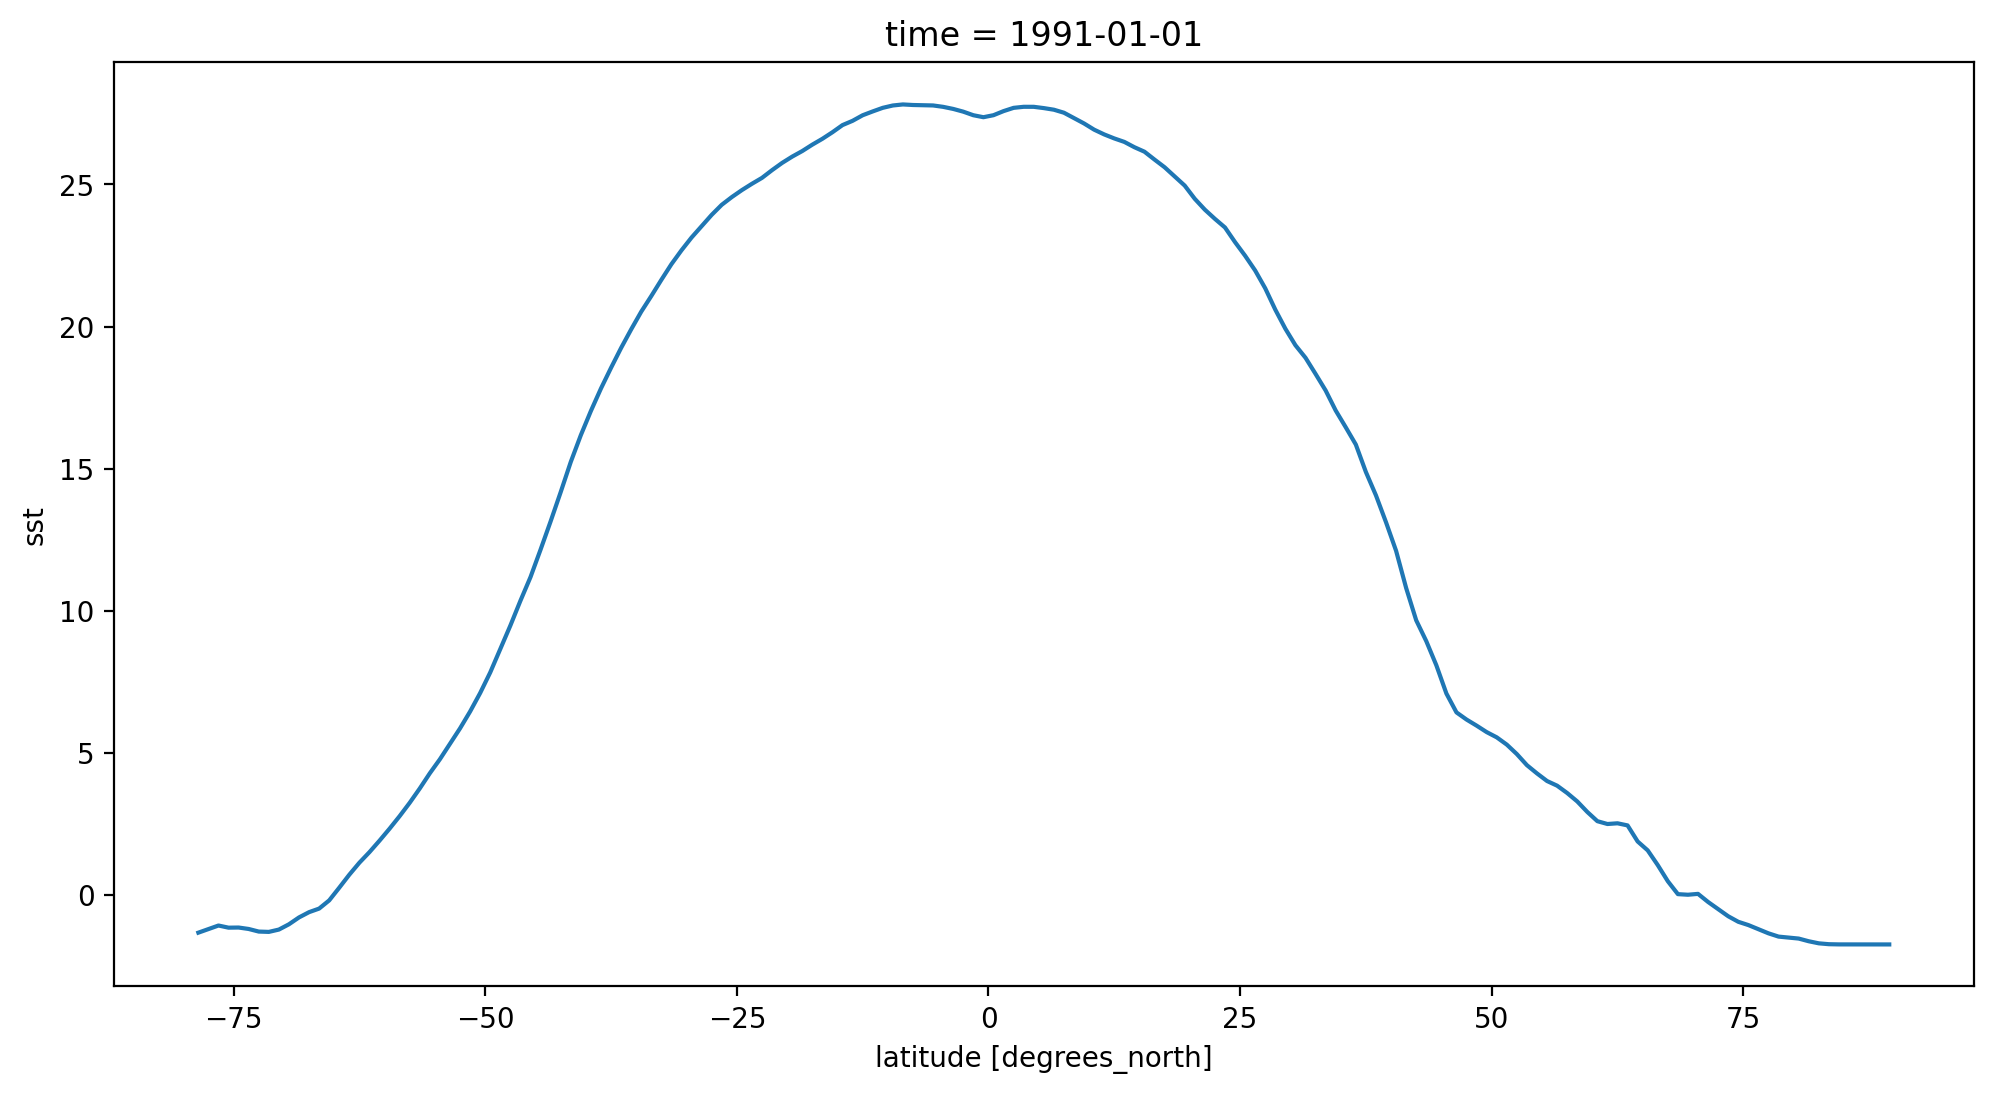

In [29]:
zonal_ave_SST.sel(time='1991-01-01').plot()

### <span style="color:red"> What patterns do you notice in the plot above? What explains it? Talk to the person next to you and place your answer in the cell below.

### Here we create a basic plot of our averaged Northern Hemisphere and Southern Hemisphere SSTs that we created earlier. We use our Matplotlib subplotting methods and plot one on top the other and specify our line colors.

### *** We do not need to specify x =, and y=, like we did for Pandas since Xarray recognizes the correct dimension and coordinate axes associated with the arrays.

### The simplest way to make a quick plot in Xarray is using the `DataArray.plot()` method as shown below.

Text(0.5, 1.0, 'Seasonal Cycle of Global Average SST')

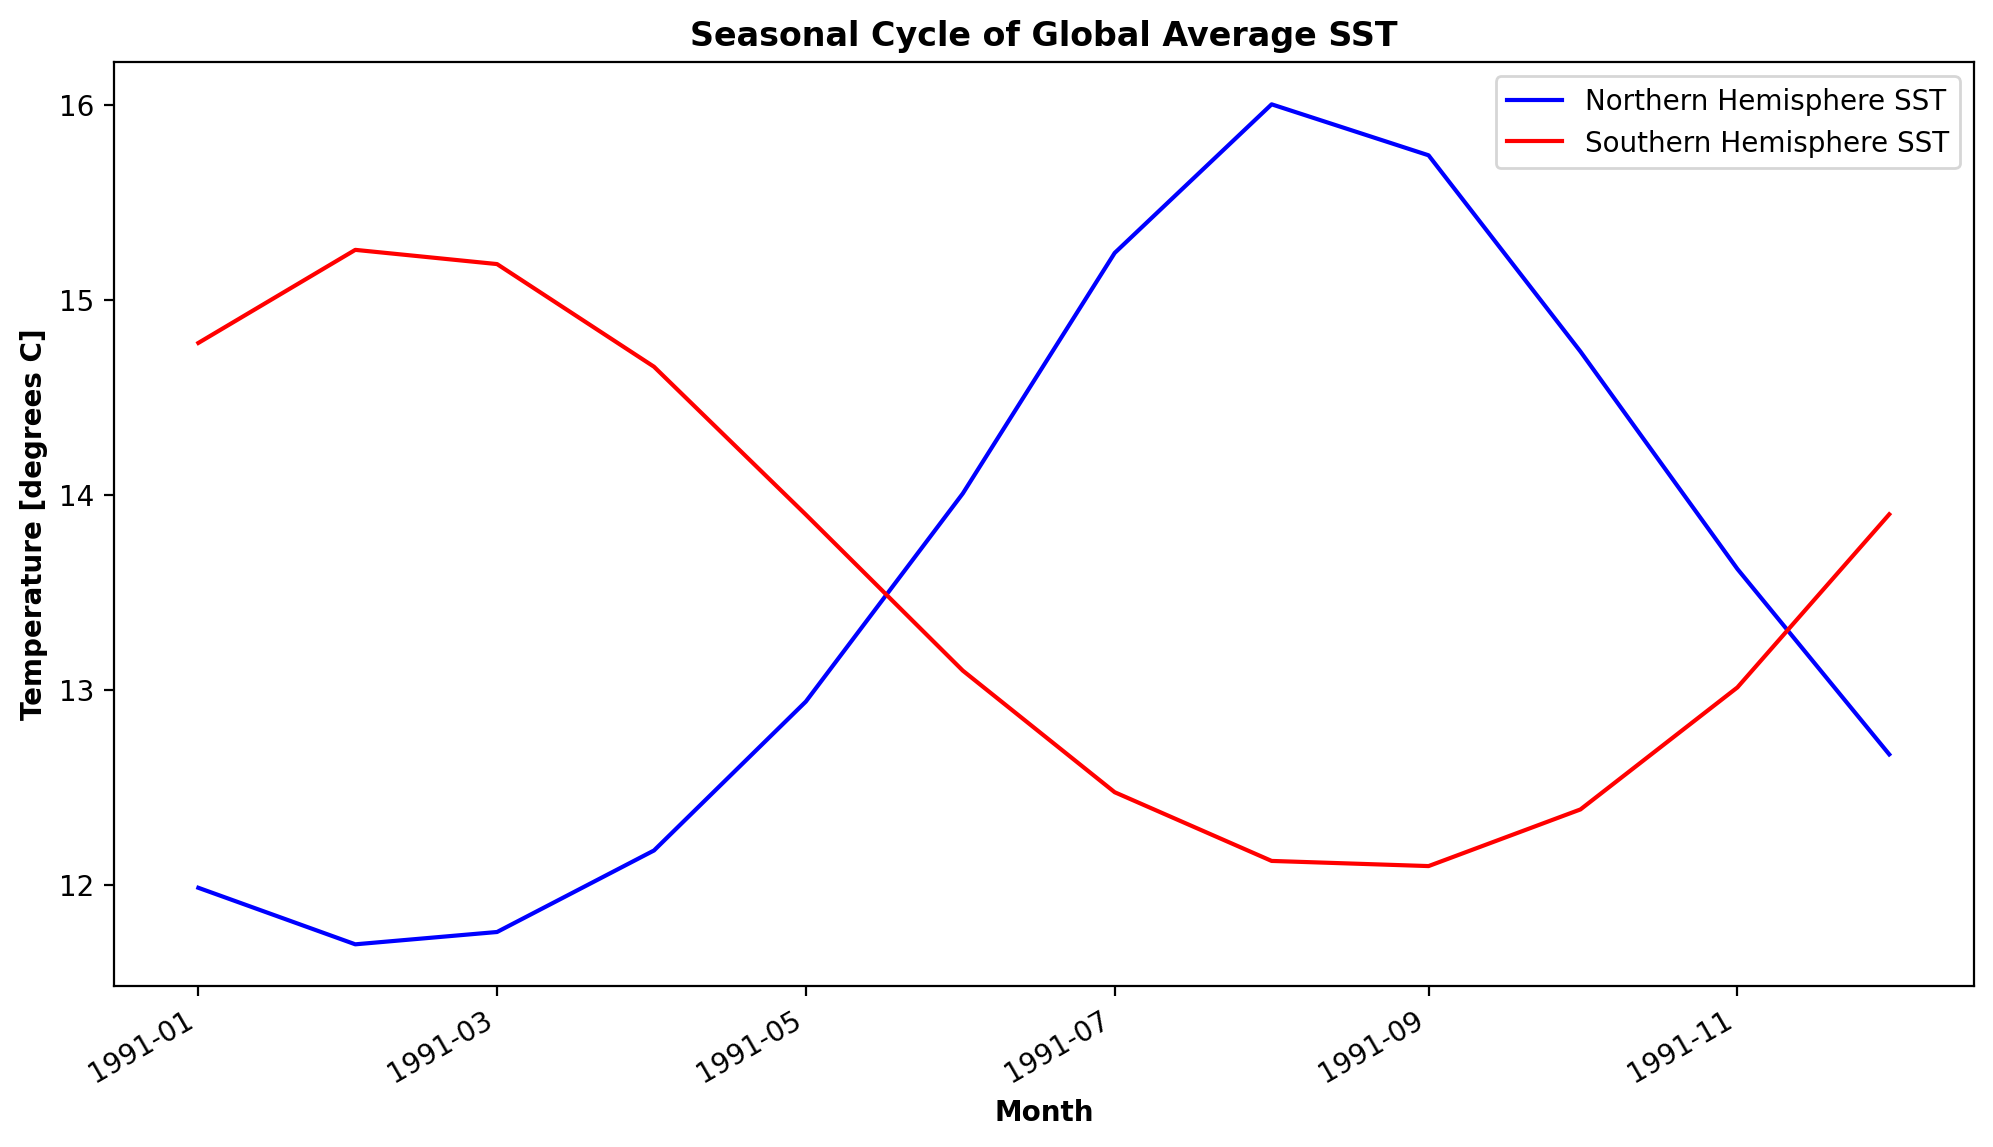

In [30]:
fig, ax0 = plt.subplots()
NH_ave_sst.plot(ax=ax0,                           #DataArray.plot(ax=axis_to_plot_on)
                color='blue',                     #color of the line
                label='Northern Hemisphere SST')  #legend label

SH_ave_sst.plot(ax=ax0,                           #DataArray.plot(ax=axis_to_plot_on)
                color='red',                     #color of the line
                label='Southern Hemisphere SST')  #legend label

ax0.set_ylabel('Temperature [degrees C]',fontweight='bold')
ax0.set_xlabel('Month',fontweight='bold')
ax0.legend()                                      #add legend to plot
plt.title("Seasonal Cycle of Global Average SST", fontweight='bold')

### By default, Xarray uses the dimension coordinates for the x-axis (here the time coordinates in calendar dates). However, we can make the plot above look more intuitive by plotting the actual month names on the x-axis.

### There are several ways to do this, but the easiest here is shown in the first 3 lines of our new code:
1. Create a list called `months` that contains strings with our month names that we want to use.
2. Drop the original time coordinate labels from our `NH_ave_sst` and `SH_ave_sst` DataArrays and assign new coordinate labels of the values in our list of months.
    -  `.drop(labels='time')` in the code below removes the labels from our original DataArray's time dimension.
    - `.assign_coords({'time':months})`, assigns the data inside of our months list to be the coordinate values of the time dimension.

Text(0.5, 1.0, 'Seasonal Cycle of Global Average SST')

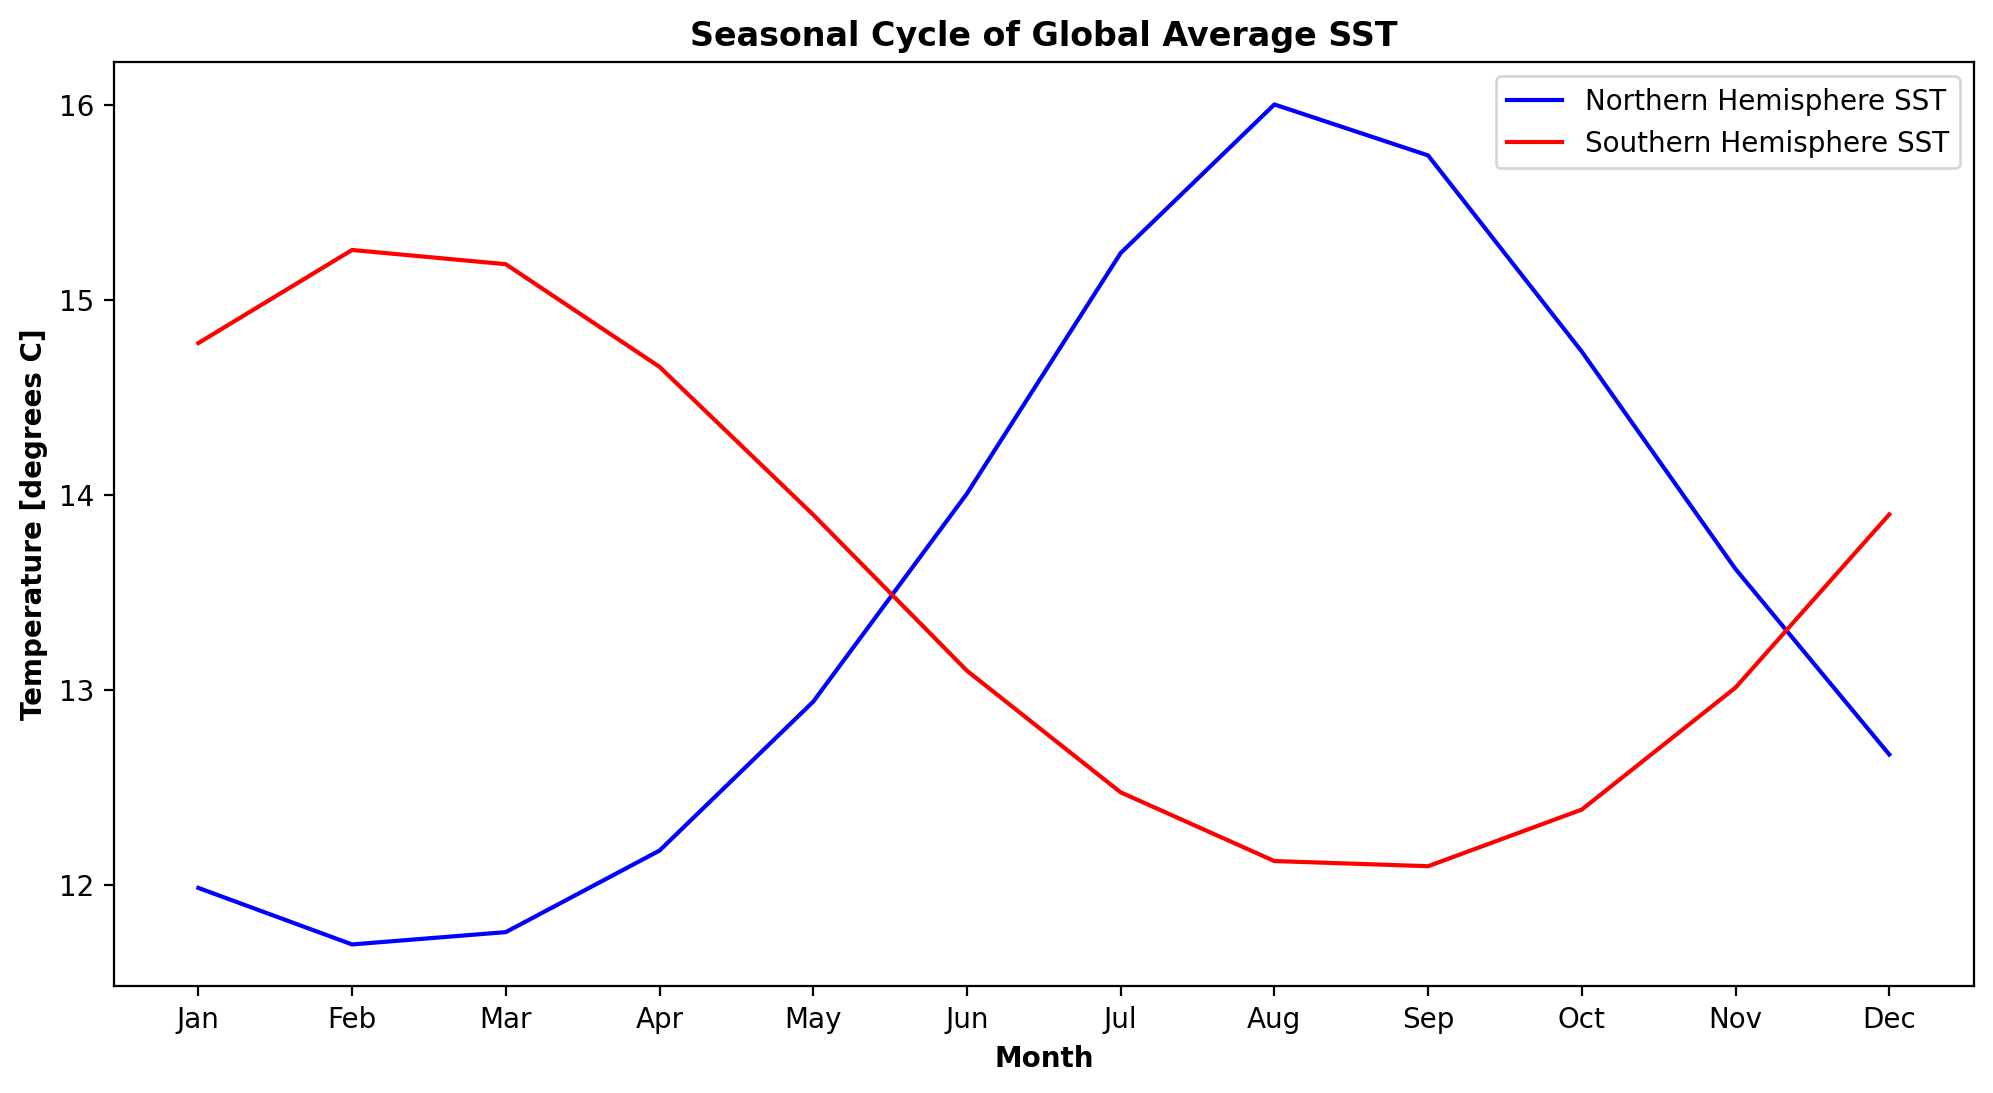

In [31]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
NH_ave_sst_months = NH_ave_sst.drop(labels='time').assign_coords({'time':months})
SH_ave_sst_months = SH_ave_sst.drop(labels='time').assign_coords({'time':months})


fig, ax0 = plt.subplots()
NH_ave_sst_months.plot(ax=ax0,                           #DataArray.plot(ax=axis_to_plot_on)
                color='blue',                     #color of the line
                label='Northern Hemisphere SST')  #legend label

SH_ave_sst_months.plot(ax=ax0,                           #DataArray.plot(ax=axis_to_plot_on)
                color='red',                     #color of the line
                label='Southern Hemisphere SST')  #legend label

ax0.set_ylabel('Temperature [degrees C]',fontweight='bold')
ax0.set_xlabel('Month',fontweight='bold')
ax0.legend()                                      #add legend to plot

plt.title("Seasonal Cycle of Global Average SST", fontweight='bold')

In [32]:
NH_ave_sst_months

<xarray.DataArray 'sst' (time: 12)>
array([11.98468 , 11.6947  , 11.757911, 12.17601 , 12.939881, 14.007138,
       15.240874, 16.003231, 15.741747, 14.735249, 13.620117, 12.668882],
      dtype=float32)
Coordinates:
  * time     (time) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'

### <span style="color:red"> Compute the full global mean SST and add it to the plot above as a thick black line.

### Now that you know how to work with a global dataset in the form of a netcdf file and do basic computations, our next task will be to learn how to do proper area-weighted spatial and temporal averages. This is a very important skill when working with global datasets that cannot be overlooked!

### Shutting down your notebook (__don't do this yet!!__ These are just instructions for when class is over).
### Before shutting down, save your notebook with the disc icon in the Notebook toolbar. Go to the the File menu and click Shut Down to close the browser table and Jupyter Lab itself.